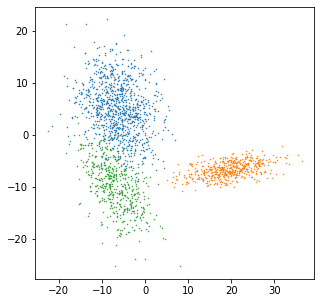

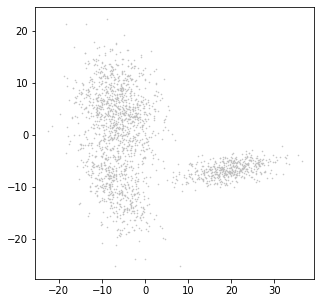

In [7]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

#ROTATION
# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r2 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]
r3 = 10*(np.random.rand(2,2) - 0.5) # [-1, 1]

t1 = 50*(np.random.rand(1,2) - 0.5)
t2 = 50*(np.random.rand(1,2) - 0.5)
t3 = 50*(np.random.rand(1,2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

# X1,X2,X3가 실행할때마다 각각 다른 랜덤 샘플로 나옴
plt.figure(figsize = (5,5))
plt.plot(X1[:,0],X1[:,1],"C0.",markersize = 1)
plt.plot(X2[:,0],X2[:,1],"C1.",markersize = 1)
plt.plot(X3[:,0],X3[:,1],"C2.",markersize = 1)

# unlabel data
X = np.vstack([X1, X2, X3])
np.random.shuffle(X)

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])


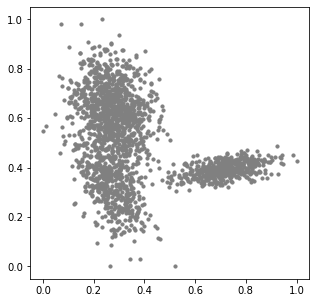

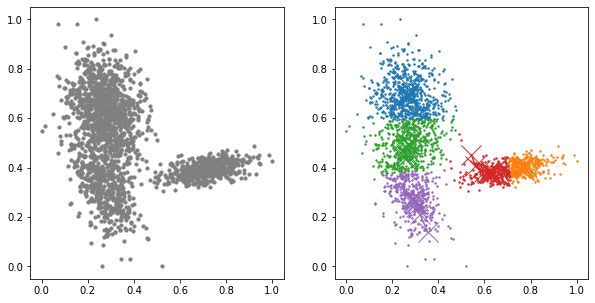

In [14]:
# parameter
K = 5 # Cluster의 개수
maxIter = 10 # 최대 반복 횟수

# normalization
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],s=10, color='gray')

# initialize
# N:샘플의 수 for n in range(N)
#D:입력의 차원 for d in range(D)
(N, D) = X.shape
mu_traj = np.zeros((K,D,maxIter)) # 3차원 array
dist = np.zeros((N,K))

# K-means 본론

#0. mu를 랜덤으로 초기화
mu = np.random.rand(K,D) # uniform random[0,1] 사이에서 균일한 분포로 랜덤을 생성
mu_traj[:,:,0]= mu

for iter in range(0, maxIter):
    #1. 전체 데이터에 대해서, 각각의 mu로부터 거리를 계산
    for k in range(0,K):
        dist[:,k] = np.sum((X-np.matlib.repmat(mu[k,:],N,1))**2, axis=1)

    #2. 계산한 거리로부터, 어떤 mu에 제일 가까운지 계산
    label = np.argmin(dist, axis=1)

    #3. 각각의 mu에 제일 가깝다고 계산된 샘플들끼리 평균을 계산 -> mu 업데이트
    #X[label == k, :]  label = k인 샘플들
    for k in range(0,K):
        mu[k,:] = np.mean(X[label == k, :], axis= 0)
    mu_traj[:,:,iter] = mu

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s=10, color='gray')

plt.subplot(1,2,2)

for k in range(0,K):
    plt.scatter(X[label==k,0],X[label==k,1],s=2)
plt.gca().set_prop_cycle(None) # 색상 로테이션을 초기화
for k in range(0,K):
    plt.plot(mu_traj[k,0],mu_traj[k,1], marker="x", markersize=20)


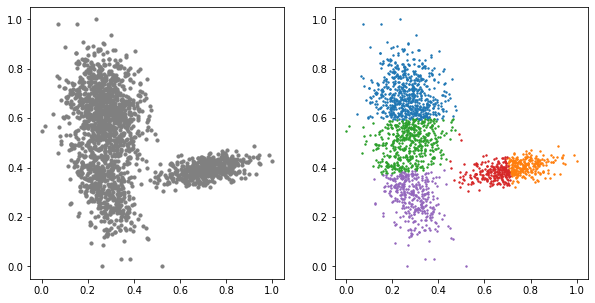

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =K)
model.fit(X)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s=10, color='gray')

plt.subplot(1,2,2)

for k in range(0,K):
    plt.scatter(X[label==k,0],X[label==k,1],s=2)